In [1]:
%matplotlib inline

In [41]:
def response_1a(E, Delta, hbar_omega, Gamma=0, Delta2=0):
    coherence = 1 + Delta**2 / (E * (E + hbar_omega))
    e = E - 1j * Gamma
    d = Delta - 1j * Delta2
    dos1 = np.real(e / np.sqrt(e**2 - d**2))
    dos2 = np.real((e + hbar_omega) / np.sqrt((e + hbar_omega)**2 - d**2))
    return (2 / hbar_omega) * coherence * dos1 * dos2

def response_1b(E, Delta, hbar_omega, Gamma=0, Delta2=0):
    coherence = 1 + Delta**2 / ((E - hbar_omega) * E)
    e = E - 1j * Gamma
    d = Delta - 1j * Delta2
    dos1 = np.real((e - hbar_omega) / np.sqrt((e - hbar_omega)**2 - d**2))
    dos2 = np.real(e / np.sqrt(e**2 - d**2))
    return -(2 / hbar_omega) * coherence * dos1 * dos2

def response1(E, Delta, hbar_omega, Gamma=0, Delta2=0):
    mask = E > hbar_omega
    r1ab = response_1a(E, Delta, hbar_omega, Gamma=Gamma, Delta2=Delta2)
    r1b = response_1b(E[mask], Delta, hbar_omega, Gamma=Gamma, Delta2=Delta2)
    r1ab[mask] += r1b
    return r1ab

def response2(E, Delta, hbar_omega, Gamma=0, Delta2=0):
    coherence = 1 + Delta**2 / ((E - hbar_omega) * E)
    e = E - 1j * Gamma
    d = Delta - 1j * Delta2
    dos1 = np.real((e - hbar_omega) / np.sqrt(d**2 - (e - hbar_omega)**2))
    dos2 = np.real(e / np.sqrt(e**2 - d**2))
    return -(2 / hbar_omega) * coherence * dos1 * dos2

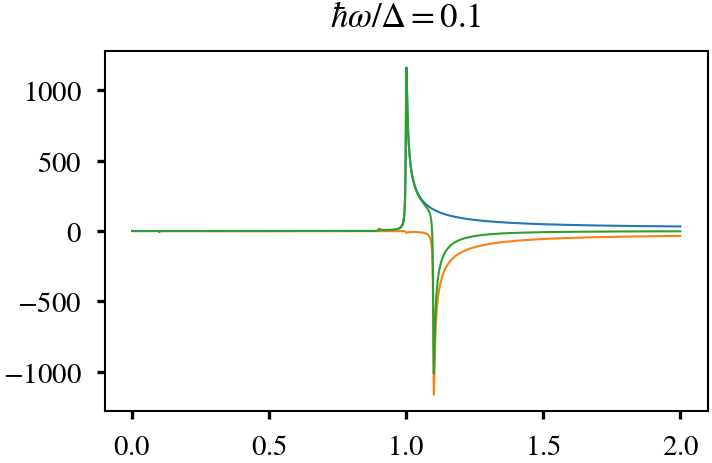

In [61]:
Delta = 1
hbar_omega = 0.1 * Delta
E = np.linspace(0.001, 2, 10000)
Eb = E[E > hbar_omega]
Gamma = 0.002
Delta2 = 0
fig, ax = plt.subplots()
ax.plot(E, response_1a(E=E, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2))
ax.plot(Eb, response_1b(E=Eb, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2))
ax.plot(E, response1(E=E, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2))
ax.legend()
ax.set_title('$\hbar \omega / \Delta = {:.4g}$'.format(hbar_omega / Delta))

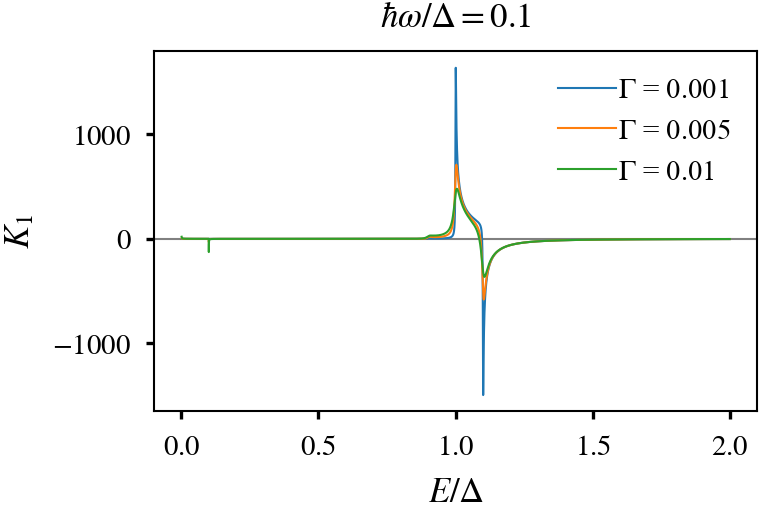

In [60]:
Delta = 1
hbar_omega = 0.1 * Delta
E = np.linspace(0.001, 2, 10000)
Eb = E[E > hbar_omega]
Gammas = [0.001, 0.005, 0.01]
Delta2 = 0
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.set_xlabel('$E / \Delta$')
ax.set_ylabel('$K_1$')
for Gamma in Gammas:
    ax.plot(E / Delta, response1(E=E, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2),
            label='$\Gamma$ = {:.4g}'.format(Gamma))
ax.legend()
ax.set_title('$\hbar \omega / \Delta = {:.4g}$'.format(hbar_omega / Delta))

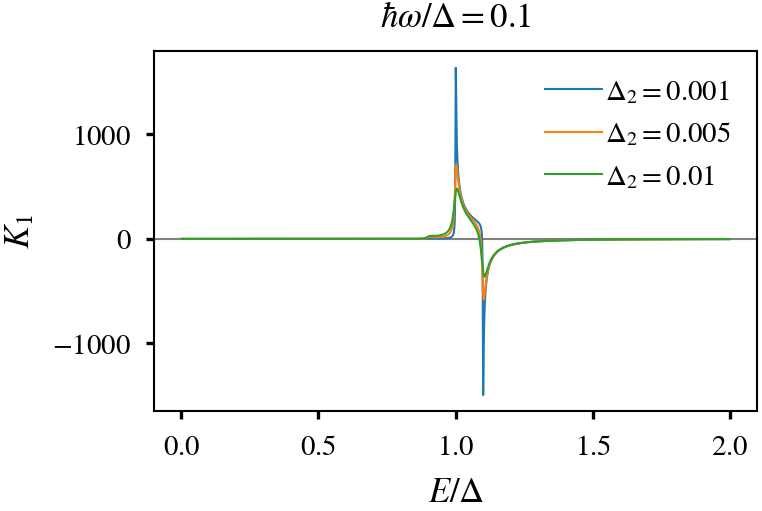

In [62]:
Delta = 1
hbar_omega = 0.1 * Delta
E = np.linspace(0.001, 2, 10000)
Eb = E[E > hbar_omega]
Gamma = 0
Delta2s = [0.001, 0.005, 0.01]
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.set_xlabel('$E / \Delta$')
ax.set_ylabel('$K_1$')
for Delta2 in Delta2s:
    ax.plot(E / Delta, response1(E=E, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2),
            label='$\Delta_2 = {:.4g}$'.format(Delta2))
ax.legend()
ax.set_title('$\hbar \omega / \Delta = {:.4g}$'.format(hbar_omega / Delta))

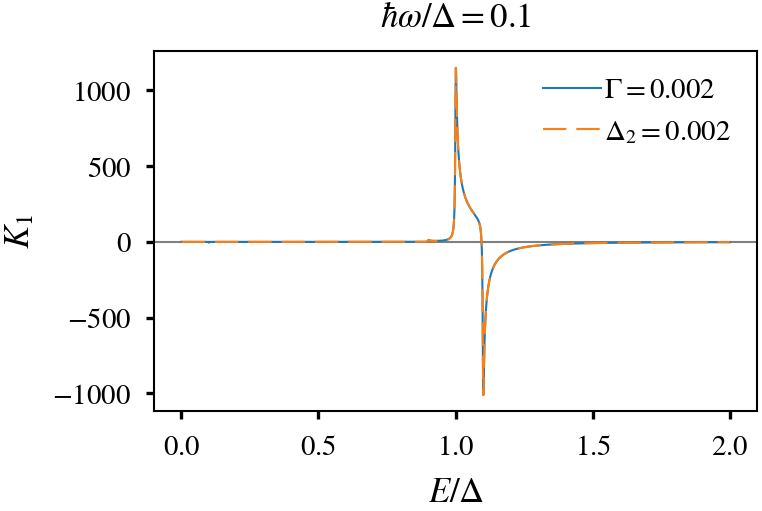

In [63]:
Delta = 1
hbar_omega = 0.1 * Delta
E = np.linspace(0.001, 2, 10000)
Eb = E[E > hbar_omega]
broadenings = [0.002]
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.set_xlabel('$E / \Delta$')
ax.set_ylabel('$K_1$')
for broadening in broadenings:
    ax.plot(E / Delta, response1(E=E, Delta=Delta, hbar_omega=hbar_omega,
                                 Gamma=broadening, Delta2=0),
            label='$\Gamma = {:.4g}$'.format(broadening), linestyle='-')
    ax.plot(E / Delta, response1(E=E, Delta=Delta, hbar_omega=hbar_omega,
                                 Gamma=0, Delta2=broadening),
            label='$\Delta_2 = {:.4g}$'.format(broadening), linestyle='--')
ax.legend()
ax.set_title('$\hbar \omega / \Delta = {:.4g}$'.format(hbar_omega / Delta))

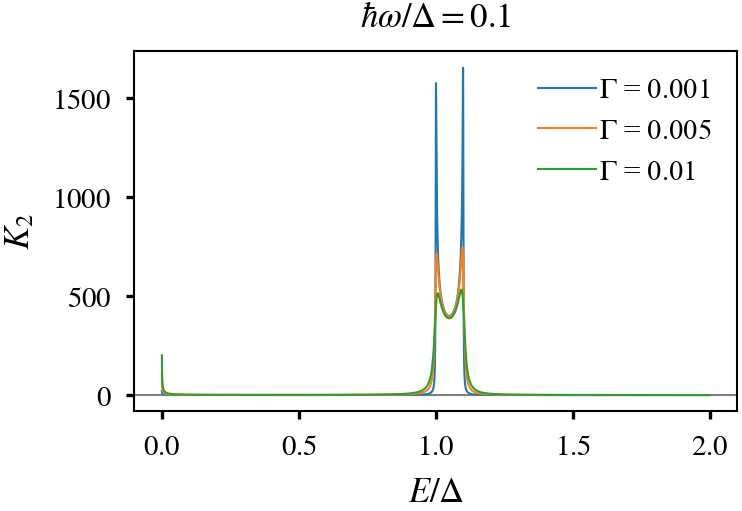

In [64]:
Delta = 1
hbar_omega = 0.1 * Delta
E = np.linspace(0.001, 2, 10000)
Eb = E[E > hbar_omega]
Gammas = [0.001, 0.005, 0.01]
Delta2 = 0
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.set_xlabel('$E / \Delta$')
ax.set_ylabel('$K_2$')
for Gamma in Gammas:
    ax.plot(E / Delta, -response2(E=E, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2),
            label='$\Gamma$ = {:.4g}'.format(Gamma))
ax.legend()
ax.set_title('$\hbar \omega / \Delta = {:.4g}$'.format(hbar_omega / Delta))

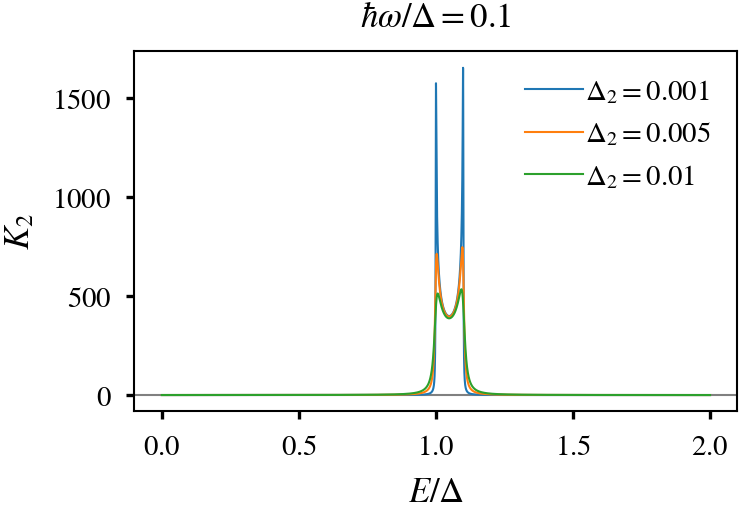

In [65]:
Delta = 1
hbar_omega = 0.1
E = np.linspace(0.001, 2, 10000)
Eb = E[E > hbar_omega]
Gamma = 0
Delta2s = [0.001, 0.005, 0.01]
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.set_xlabel('$E / \Delta$')
ax.set_ylabel('$K_2$')
for Delta2 in Delta2s:
    ax.plot(E / Delta, -response2(E=E, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2),
            label='$\Delta_2 = {:.4g}$'.format(Delta2))
ax.legend()
ax.set_title('$\hbar \omega / \Delta = {:.4g}$'.format(hbar_omega / Delta))

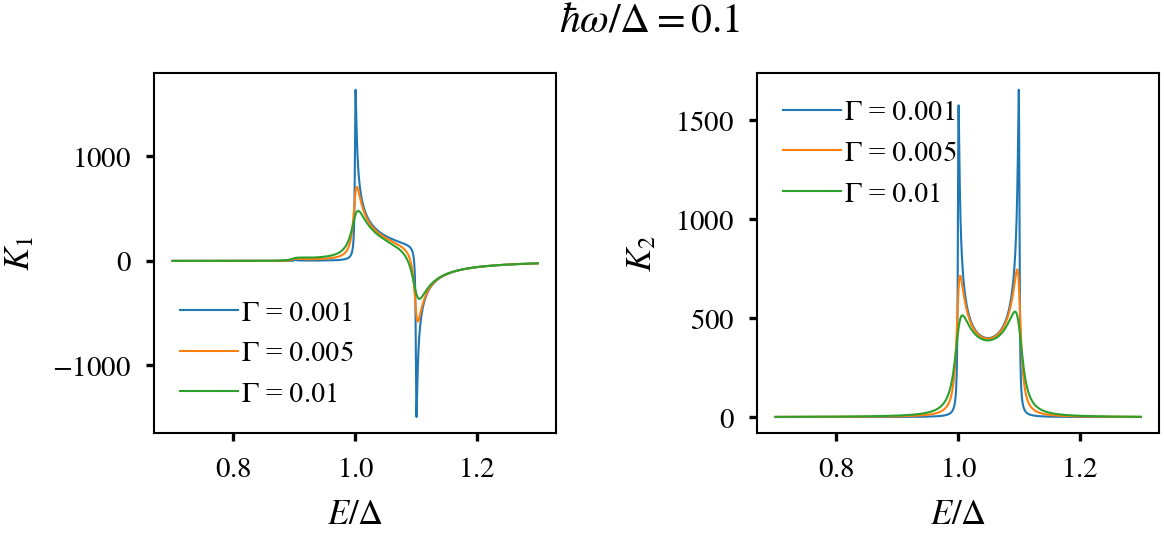

In [77]:
Delta = 1
hbar_omega = 0.1 * Delta
E = np.linspace(0.7, 1.3, 10000)
Eb = E[E > hbar_omega]
colors = ('blue', 'green', 'red')
Gammas = [0.001, 0.005, 0.01]
Delta2 = 0
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2), gridspec_kw={'wspace': 0.5})
ax1.set_xlabel('$E / \Delta$')
ax2.set_xlabel('$E / \Delta$')
ax1.set_ylabel('$K_1$')
ax2.set_ylabel('$K_2$')
for Gamma, color in zip(Gammas, colors):
    ax1.plot(E / Delta, response1(E=E, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2),
            label='$\Gamma$ = {:.4g}'.format(Gamma), linestyle='-', alpha=1)
    ax2.plot(E / Delta, -response2(E=E, Delta=Delta, hbar_omega=hbar_omega, Gamma=Gamma, Delta2=Delta2),
            label='$\Gamma$ = {:.4g}'.format(Gamma), linestyle='-', alpha=1)
ax1.legend()
ax2.legend()
fig.text(0.5, 0.9, '$\hbar \omega / \Delta = {:.4g}$'.format(hbar_omega / Delta))
#fig.savefig('/Users/daniel/Johnson+Miller/mkid/multichroic/presentation/2017-03-16 Mattis-Bardeen broadening/K1_and_K2.pdf')